# Prediction of House Prices

### Objective:
In this project we will try to build a keras model(Linear Regression Model) to predict the price of houses in King County, USA based on different features.

### Data
We will be using the dataset House Sales in King County, USA from Kaggle.com:  
https://www.kaggle.com/harlfoxem/housesalesprediction

#### Features
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/DK/OneDrive/Desktop/udemy/TensorFlow_FILES/DATA/kc_house_data.csv')

## EDA

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


#### Let's check how the price is varying

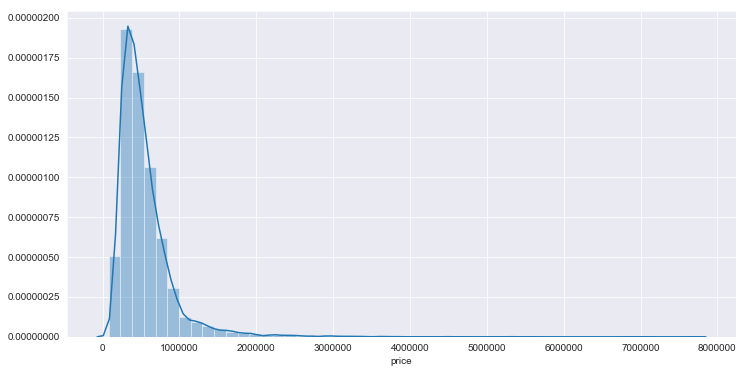

In [5]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,6))
sns.distplot(df['price'])

#### Here we will check what is the most preffered number of bedrooms

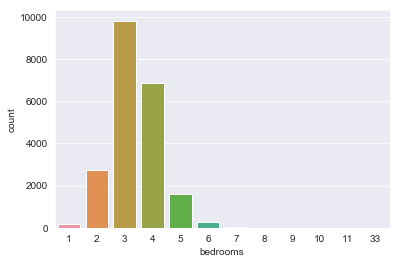

In [6]:
sns.countplot(df['bedrooms'])

Most of the houses have 3-4 bedrooms.

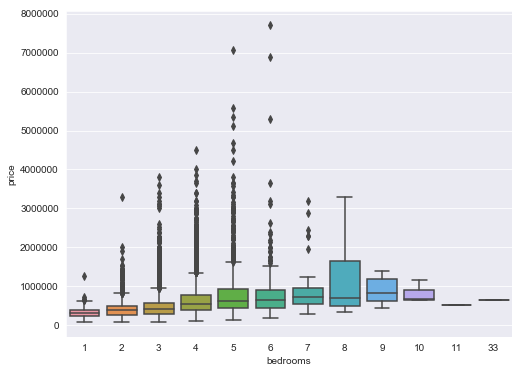

In [7]:
plt.figure(figsize = (8,6))
sns.boxplot(x='bedrooms', y = 'price', data = df)

#### Here we wish to know what is preffered number of bathrooms

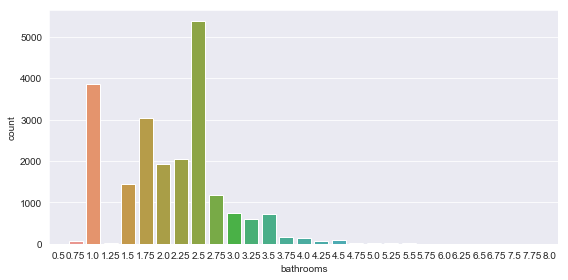

In [8]:
plt.figure(figsize = (8,4))
sns.countplot(df['bathrooms'])
plt.tight_layout()

Majority of houses have 2.5 bedrooms.

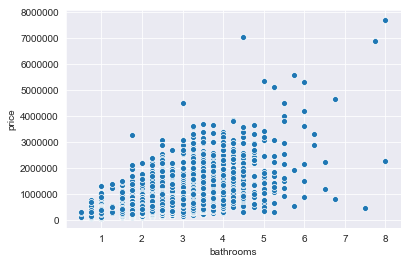

In [9]:
sns.scatterplot(x='bathrooms', y = 'price', data = df)

#### How the price varies with the area of living space and land area.

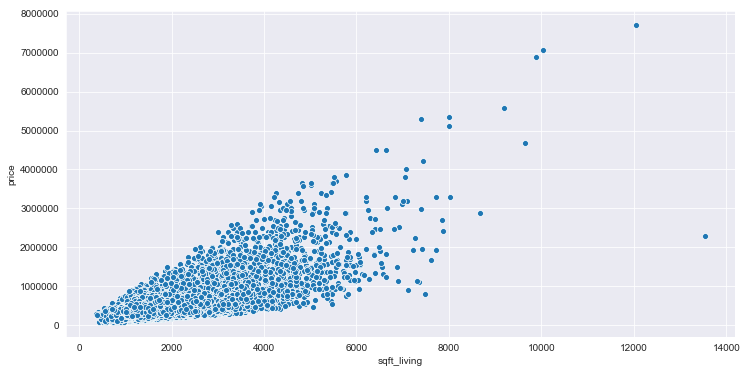

In [10]:
plt.figure(figsize = (12,6))
sns.scatterplot(x= 'sqft_living', y = 'price', data = df)

Price of houses incrreses linearly with area of interior living space, which is expected. 

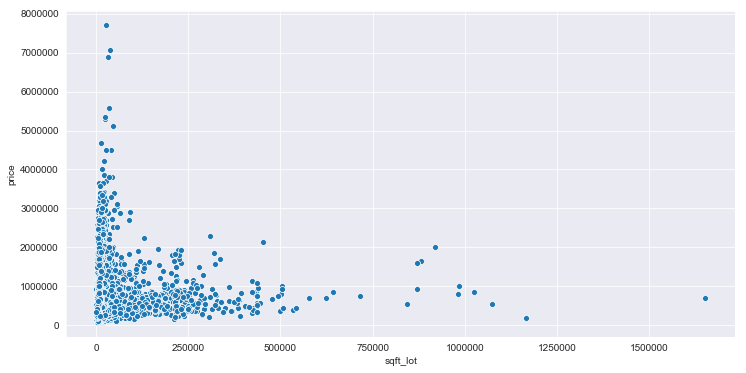

In [11]:
plt.figure(figsize = (12,6))
sns.scatterplot(x= 'sqft_lot', y = 'price', data = df)

People tend to buy houses with land area less than 25,000 square feet. Prices are lesser for higher land area which quite unusual.  

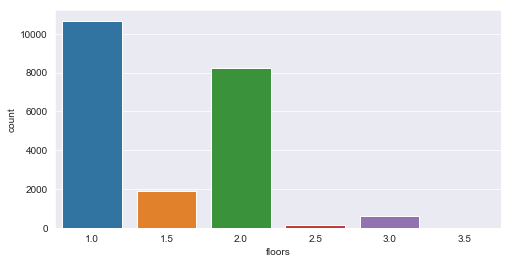

In [12]:
plt.figure(figsize = (8,4))
sns.countplot(df['floors'])

Majority of houses have 1 and 2 floors.

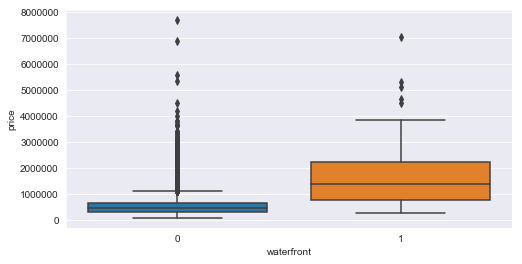

In [13]:
plt.figure(figsize = (8,4))
sns.boxplot('waterfront', 'price', data = df)

Houses with waterfront overlook have higher prices.

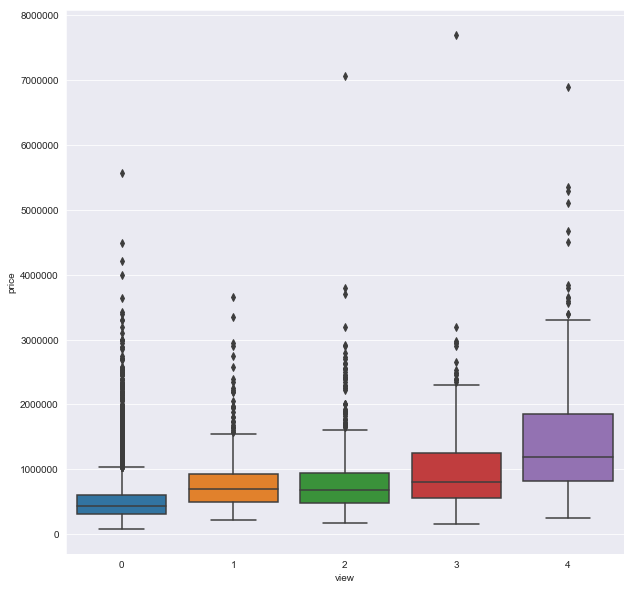

In [14]:
plt.figure(figsize = (10,10))
sns.boxplot('view', 'price', data = df)

People are willing to pay more for a better of house.

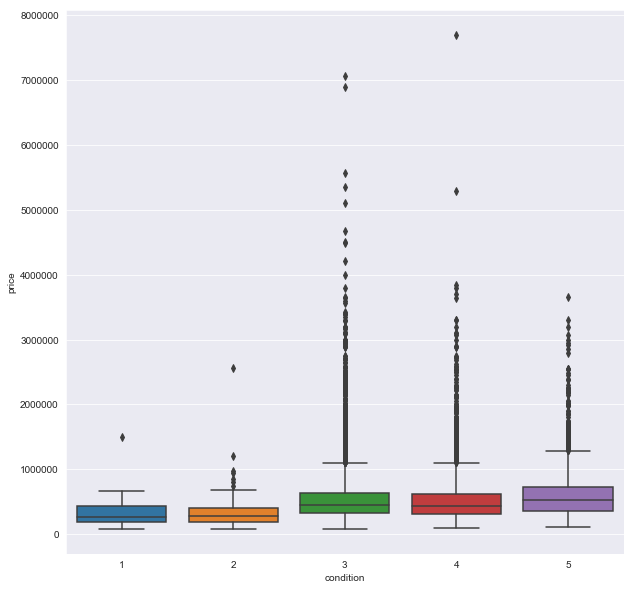

In [15]:
plt.figure(figsize = (10,10))
sns.boxplot('condition', 'price', data = df)

Looking at the plot above we may infer that people are willing to pay high for an average conditioned house.

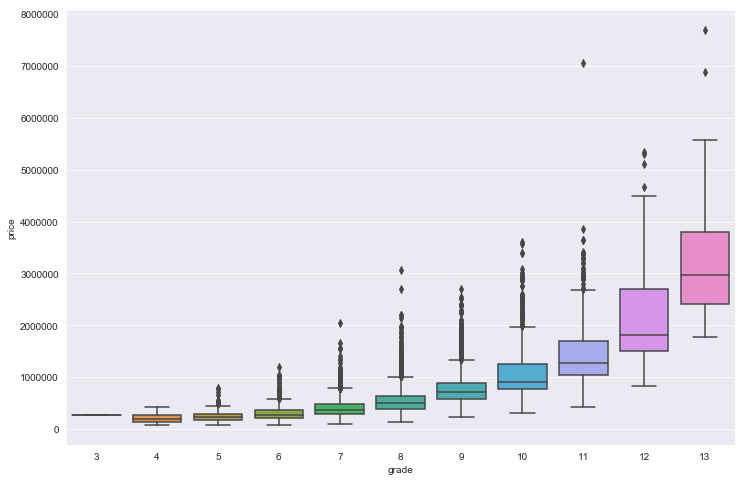

In [16]:
plt.figure(figsize = (12,8))
sns.boxplot('grade', 'price', data = df)

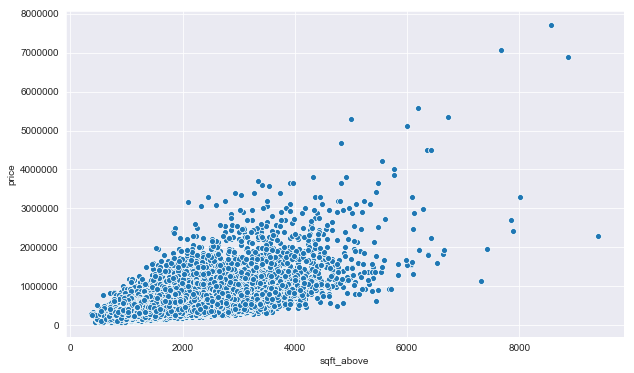

In [17]:
plt.figure(figsize = (10,6))
sns.scatterplot('sqft_above', 'price', data = df)

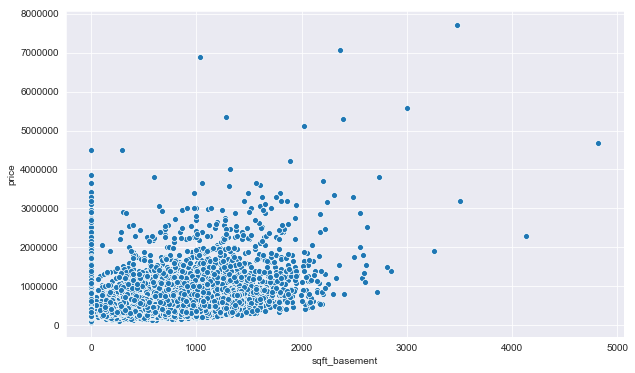

In [18]:
plt.figure(figsize = (10,6))
sns.scatterplot('sqft_basement', 'price', data = df)

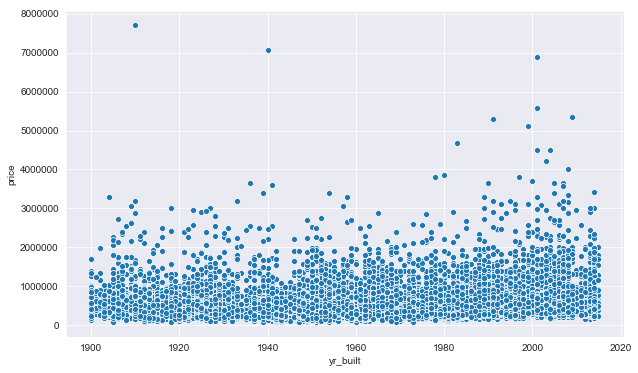

In [19]:
plt.figure(figsize = (10,6))
sns.scatterplot('yr_built', 'price', data = df)

##  Geographical Properties

### Latitude

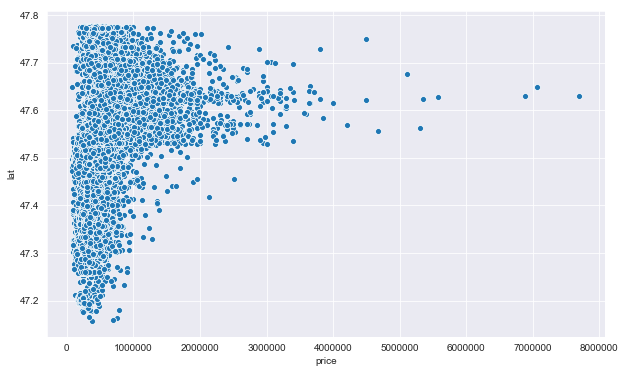

In [20]:
plt.figure(figsize = (10,6))
sns.scatterplot('price', 'lat', data = df)

The prices of houses are maximum in the latitude range of 47.6 to 47.7

### Longitude

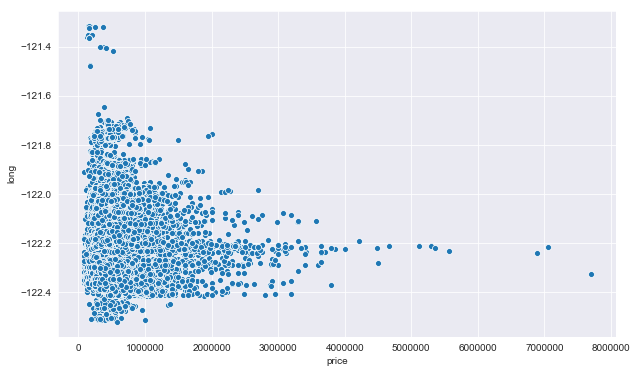

In [21]:
plt.figure(figsize = (10,6))
sns.scatterplot('price', 'long', data = df)

It looks like prices are higher in longitude range of -122.4 to -122.2 

### Combining lat and long

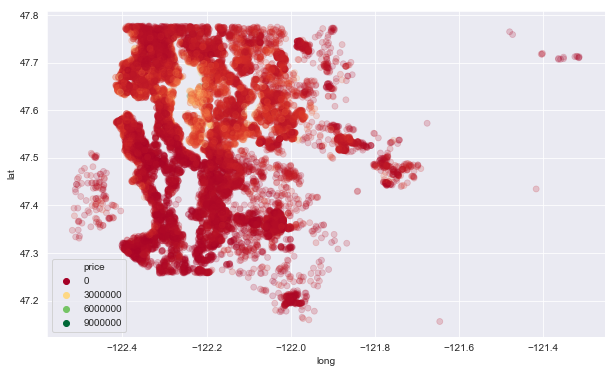

In [22]:
plt.figure(figsize = (10,6))
sns.scatterplot('long', 'lat', data = df, hue = 'price', palette = 'RdYlGn', edgecolor = None, alpha = 0.2)

We are not able to see much of a gradient in the plot, this may be due to the presence of expensive outliers in the data. We can remove those outliers and than plot again to see the gradient.

In [23]:
df.sort_values('price', ascending = False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [24]:
len(df)*0.01

215.97

Let's create another dataframe which does not contain top 1 percent houses.

In [25]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

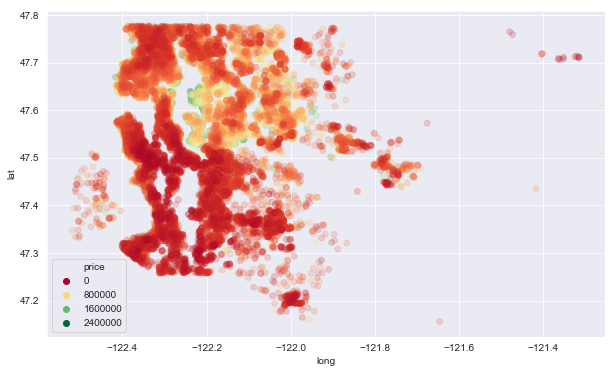

In [26]:
plt.figure(figsize = (10,6))
sns.scatterplot('long', 'lat', data = df.sort_values('price',ascending=False).iloc[216:]
                , hue = 'price', palette = 'RdYlGn', edgecolor = None, alpha = 0.2)

If we look closely we can conclude that houses near the water body have higher price. The blank portion near the green color is a lake in actual map of King County. 

### Handling Date

In [27]:
df['date'] = pd.to_datetime(df['date'])

In [28]:
df['month'] = df['date'].apply(lambda date: date.month)

In [29]:
df['year'] =df['date'].apply(lambda date: date.year)

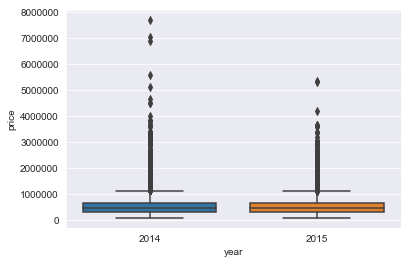

In [30]:
sns.boxplot(x = 'year', y = 'price', data = df)

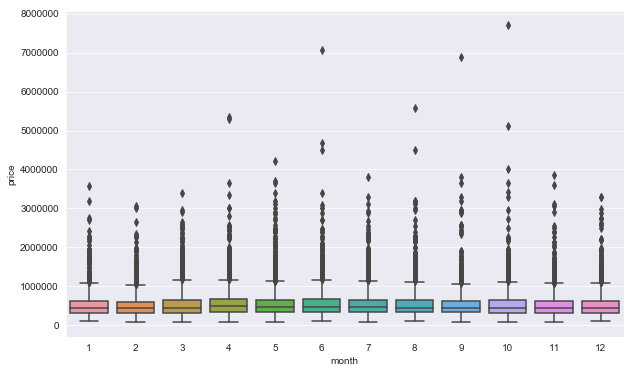

In [31]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'month', y = 'price', data = df)

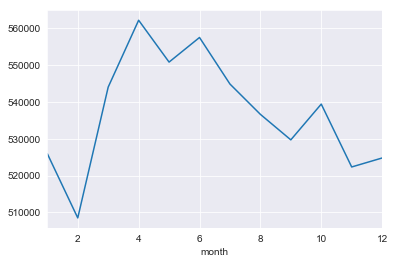

In [32]:
df.groupby('month').mean()['price'].plot()

People prefer to buy house in the month of April and June.

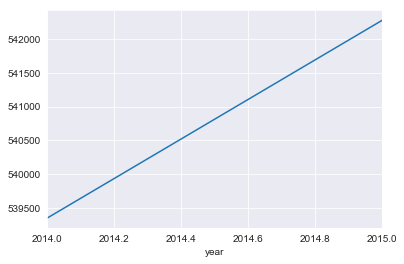

In [33]:
df.groupby('year').mean()['price'].plot()

In [34]:
df = df.drop('date', axis = 1)

In [35]:
df = df.drop('zipcode', axis = 1)

In [36]:
df = df.drop('id', axis = 1)

In [37]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [38]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

## Scaling and Train Test Split

In [39]:
X = df.drop('price', axis = 1)
y = df['price']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()

In [44]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\DK\anaconda3\envs\python35\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [45]:
X_train.shape

(15117, 19)

In [46]:
X_test.shape

(6480, 19)

## Creating Model

The model contains four layers of "19 neurons" each with "relu" activation function and an output layer which gives a continous value output.

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [48]:
model = Sequential()

In [49]:
model.add(Dense(19, activation= 'relu'))
model.add(Dense(19, activation= 'relu'))
model.add(Dense(19, activation= 'relu'))
model.add(Dense(19, activation= 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

## Training the Model

In [50]:
model.fit(x = X_train, y = y_train.values, 
          validation_data=(X_test, y_test.values),
          batch_size = 128, epochs = 400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 2s 151us/step - loss: 430237893614.8622 - val_loss: 418908995664.9086
Epoch 2/400
15117/15117 [==============================] - 1s 60us/step - loss: 429200876577.2595 - val_loss: 415286507747.5555
Epoch 3/400
15117/15117 [==============================] - 1s 61us/step - loss: 413939993892.1553 - val_loss: 379707045063.7432
Epoch 4/400
15117/15117 [==============================] - 1s 60us/step - loss: 335950301154.0597 - val_loss: 253073900693.1753
Epoch 5/400
15117/15117 [==============================] - 1s 50us/step - loss: 181657857942.0573 - val_loss: 113063653042.2518
Epoch 6/400
15117/15117 [==============================] - 1s 56us/step - loss: 102533460712.9859 - val_loss: 94454357004.6420
Epoch 7/400
15117/15117 [==============================] - 1s 55us/step - loss: 96799193629.5000 - val_loss: 93033208551.3481
Epoch 8/400
15117/15117 [==============================] 

15117/15117 [==============================] - 1s 49us/step - loss: 38309415828.2284 - val_loss: 36982741280.2370
Epoch 66/400
15117/15117 [==============================] - 1s 41us/step - loss: 38085092176.2191 - val_loss: 36751800208.7506
Epoch 67/400
15117/15117 [==============================] - 1s 48us/step - loss: 37869808770.1253 - val_loss: 36527610776.3358
Epoch 68/400
15117/15117 [==============================] - 1s 46us/step - loss: 37674437820.5157 - val_loss: 36429845840.2765
Epoch 69/400
15117/15117 [==============================] - 1s 37us/step - loss: 37504206639.3660 - val_loss: 36135127409.1457
Epoch 70/400
15117/15117 [==============================] - 1s 39us/step - loss: 37294547160.0175 - val_loss: 35967920497.1457
Epoch 71/400
15117/15117 [==============================] - 1s 44us/step - loss: 37130084666.0348 - val_loss: 35839418185.9556
Epoch 72/400
15117/15117 [==============================] - 1s 44us/step - loss: 37000128075.3589 - val_loss: 35614044392.61

15117/15117 [==============================] - 1s 60us/step - loss: 32981689976.6081 - val_loss: 31494724534.6765
Epoch 130/400
15117/15117 [==============================] - 1s 44us/step - loss: 32929027757.9858 - val_loss: 31454861054.1037
Epoch 131/400
15117/15117 [==============================] - 1s 39us/step - loss: 32877231484.2829 - val_loss: 31390608432.0395
Epoch 132/400
15117/15117 [==============================] - 1s 44us/step - loss: 32846604328.0333 - val_loss: 31368246623.4469
Epoch 133/400
15117/15117 [==============================] - 1s 49us/step - loss: 32787601042.9583 - val_loss: 31409848845.9062
Epoch 134/400
15117/15117 [==============================] - 1s 50us/step - loss: 32845602020.6845 - val_loss: 31318546330.8642
Epoch 135/400
15117/15117 [==============================] - 1s 44us/step - loss: 32777574988.6459 - val_loss: 31282031264.5531
Epoch 136/400
15117/15117 [==============================] - 1s 46us/step - loss: 32733450743.7021 - val_loss: 3122209

15117/15117 [==============================] - 1s 39us/step - loss: 31471290071.1707 - val_loss: 29745718557.7086
Epoch 194/400
15117/15117 [==============================] - 1s 35us/step - loss: 31461619044.6761 - val_loss: 29745892956.2864
Epoch 195/400
15117/15117 [==============================] - 1s 36us/step - loss: 31461295525.2645 - val_loss: 29713219503.0914
Epoch 196/400
15117/15117 [==============================] - 1s 43us/step - loss: 31444155615.6042 - val_loss: 29717565263.0123
Epoch 197/400
15117/15117 [==============================] - 1s 50us/step - loss: 31468018562.6164 - val_loss: 29735072826.1531
Epoch 198/400
15117/15117 [==============================] - 1s 42us/step - loss: 31400168119.1305 - val_loss: 29689691967.8420
Epoch 199/400
15117/15117 [==============================] - 1s 57us/step - loss: 31397402582.2393 - val_loss: 29637017852.8395
Epoch 200/400
15117/15117 [==============================] - 1s 56us/step - loss: 31375251538.9794 - val_loss: 2961098

15117/15117 [==============================] - 1s 40us/step - loss: 30643527463.7116 - val_loss: 28706772107.0617
Epoch 258/400
15117/15117 [==============================] - 1s 41us/step - loss: 30605404100.3903 - val_loss: 28670455792.8296
Epoch 259/400
15117/15117 [==============================] - 1s 39us/step - loss: 30611418226.4100 - val_loss: 28725686433.8173
Epoch 260/400
15117/15117 [==============================] - 1s 40us/step - loss: 30608199781.7429 - val_loss: 28656809999.1704
Epoch 261/400
15117/15117 [==============================] - 1s 40us/step - loss: 30586978938.8434 - val_loss: 28622045467.1802
Epoch 262/400
15117/15117 [==============================] - 1s 49us/step - loss: 30556781621.4455 - val_loss: 28686350786.0543
Epoch 263/400
15117/15117 [==============================] - 1s 40us/step - loss: 30634832354.1613 - val_loss: 28577805976.9679
Epoch 264/400
15117/15117 [==============================] - 1s 41us/step - loss: 30532586544.5684 - val_loss: 2869893

15117/15117 [==============================] - 1s 40us/step - loss: 29907202263.6110 - val_loss: 27849266112.7901
Epoch 322/400
15117/15117 [==============================] - 1s 40us/step - loss: 29891564448.6922 - val_loss: 27832157712.4346
Epoch 323/400
15117/15117 [==============================] - 1s 39us/step - loss: 29906907749.4381 - val_loss: 27831242858.1926
Epoch 324/400
15117/15117 [==============================] - 1s 40us/step - loss: 29892756369.9252 - val_loss: 27791108515.7136
Epoch 325/400
15117/15117 [==============================] - 1s 43us/step - loss: 29871916746.4359 - val_loss: 27768172877.7481
Epoch 326/400
15117/15117 [==============================] - 1s 40us/step - loss: 29879045076.9862 - val_loss: 27752564816.9086
Epoch 327/400
15117/15117 [==============================] - 1s 41us/step - loss: 29872875766.4320 - val_loss: 27755682656.7111
Epoch 328/400
15117/15117 [==============================] - 1s 40us/step - loss: 29842317800.7996 - val_loss: 2775400

Epoch 385/400
15117/15117 [==============================] - 1s 36us/step - loss: 29227955438.9130 - val_loss: 27008230842.4691
Epoch 386/400
15117/15117 [==============================] - 1s 69us/step - loss: 29218048800.5313 - val_loss: 26989857597.3136
Epoch 387/400
15117/15117 [==============================] - 1s 49us/step - loss: 29237698236.8883 - val_loss: 26962490026.6667
Epoch 388/400
15117/15117 [==============================] - 1s 54us/step - loss: 29225501020.7168 - val_loss: 26927773549.3531
Epoch 389/400
15117/15117 [==============================] - 1s 54us/step - loss: 29236307737.0124 - val_loss: 26937796891.1802
Epoch 390/400
15117/15117 [==============================] - 1s 51us/step - loss: 29190088939.5938 - val_loss: 26904208497.7778
Epoch 391/400
15117/15117 [==============================] - 1s 51us/step - loss: 29190482933.2296 - val_loss: 26897089260.4049
Epoch 392/400
15117/15117 [==============================] - 1s 69us/step - loss: 29168008994.3603 - val

In [51]:
losses = pd.DataFrame(model.history.history)

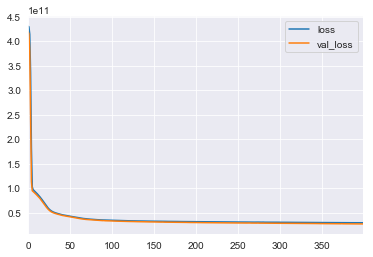

In [52]:
losses.plot()

## Evaluation on Test Data

In [53]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [54]:
predictions = model.predict(X_test)

In [55]:
mean_absolute_error(y_test, predictions)

101685.29307846258

In [56]:
np.sqrt(mean_squared_error(y_test, predictions))

163805.2451469356

In [58]:
explained_variance_score(y_test, predictions)

0.7977586454968129

In [59]:
y_test.head()

15832    319000.0
6001     464625.0
4256     489950.0
15849    395000.0
4088     458000.0
Name: price, dtype: float64

In [61]:
y_test.values

array([ 319000.,  464625.,  489950., ...,  422500.,  435000., 1230000.])

In [62]:
errors = y_test.values.reshape(6480, 1) - predictions

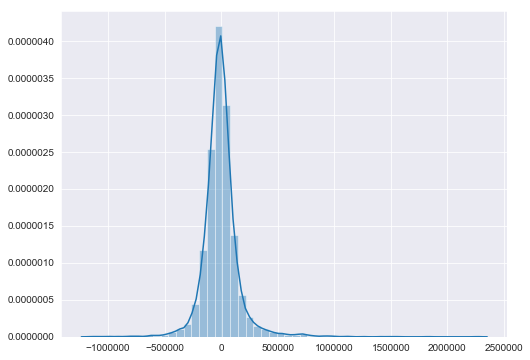

In [64]:
plt.figure(figsize = (8,6))
sns.distplot(errors)

#### Let's see our predictions on a single house from the dataset. 

In [65]:
house =  df.drop('price', axis = 1).iloc[7]

In [66]:
house = scaler.transform(house.values.reshape(-1,19))

In [67]:
house

array([[0.2       , 0.16      , 0.07135471, 0.00556747, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.0918775 ,
        0.        , 0.54782609, 0.        , 0.40791378, 0.16943522,
        0.21528136, 0.0105566 , 0.        , 1.        ]])

In [68]:
model.predict(house)

array([[258303.62]], dtype=float32)

In [71]:
df['price'].iloc[7]

291850.0

##### There is a difference of 33,547 dollars in our prediction and actual price of the house

## Simple Regression Model
Let's build a simple regression model to compare it with our original model.

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
linreg = LinearRegression()

In [74]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
preds = linreg.predict(X_test)

In [76]:
mean_absolute_error(y_test, preds)

123998.5721289351

In [77]:
np.sqrt(mean_squared_error(y_test, preds))

201080.55278529547

In [78]:
linreg_error = y_test.values.reshape(6480, 1) - predictions

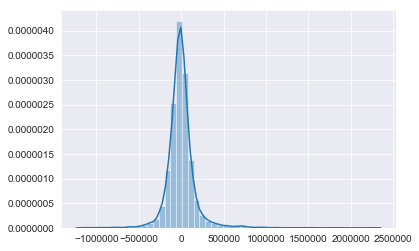

In [79]:
sns.distplot(linreg_error)

##### We can clearly see that both mean absolute error and mean sqaured error is more in simple linear regression model.